<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/7)_TensorFlow_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow Functional API - Neural Network for Nonlinear Regression

In [1]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Step 2: Generate 3-Variable Synthetic Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2) + np.random.normal(0, 0.2, n_samples)
    X = np.stack([x1, x2, x3], axis=1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X_train, y_train = generate_data()

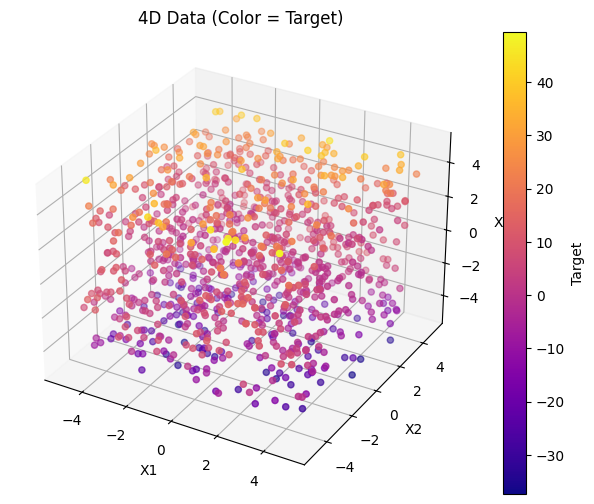

In [3]:
# Step 3: Visualize 4D Training Data
def plot_4d_data(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], cmap='plasma')
    plt.colorbar(scatter, label='Target')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Data (Color = Target)")
    plt.show()

plot_4d_data(X_train, y_train)

In [4]:
# Step 4: Define Model using Functional API
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
x = Dense(64)(inputs)
x = ReLU()(x)
x = Dense(32)(x)
x = ReLU()(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)

In [5]:
# Step 5: Compile & Train
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)


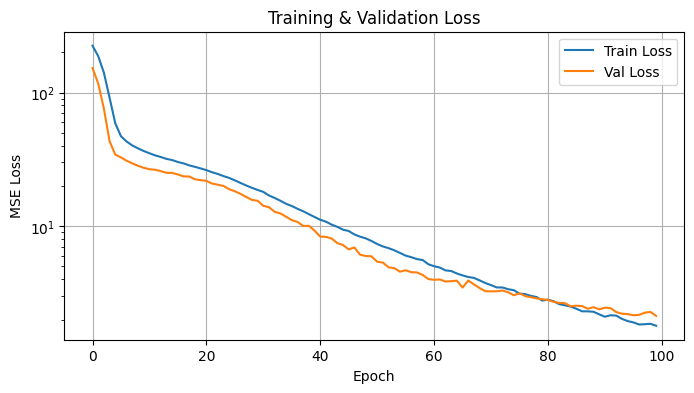

In [6]:
# Step 6: Plot Training & Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
# Step 7: Predictions on Training Data
y_pred = model.predict(X_train)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


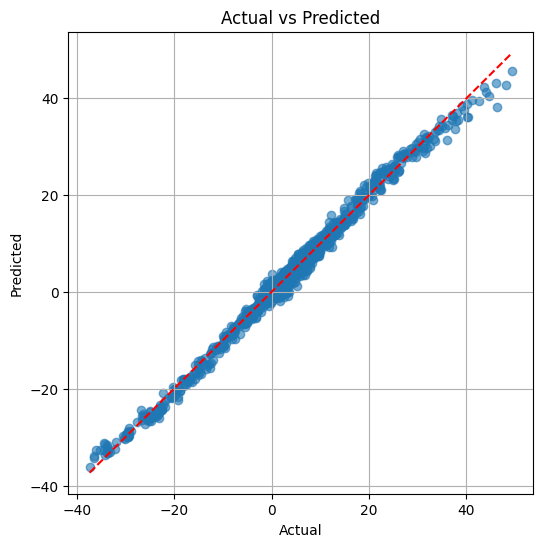

In [8]:
# Step 8: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

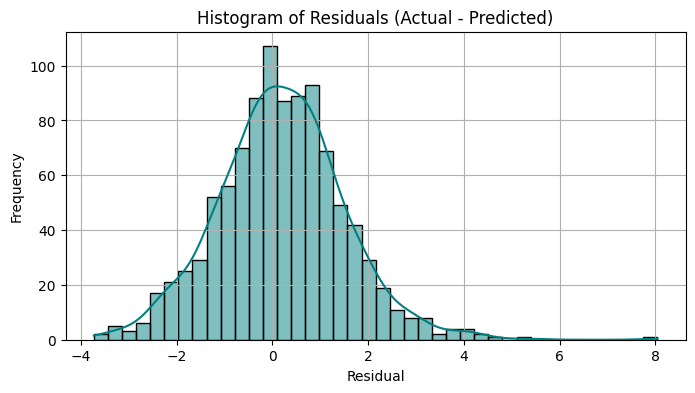

In [9]:
# Step 9: Residual Histogram
residuals = (y_train - y_pred).flatten()
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True, color='teal')
plt.title("Histogram of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


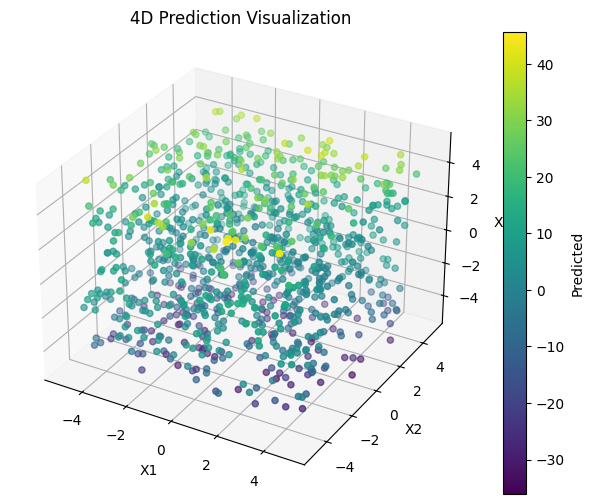

In [10]:
# Step 10: 4D Prediction Visualization
def plot_4d_predictions(X, y_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred[:, 0], cmap='viridis')
    plt.colorbar(scatter, label='Predicted')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization")
    plt.show()

plot_4d_predictions(X_train, y_pred)


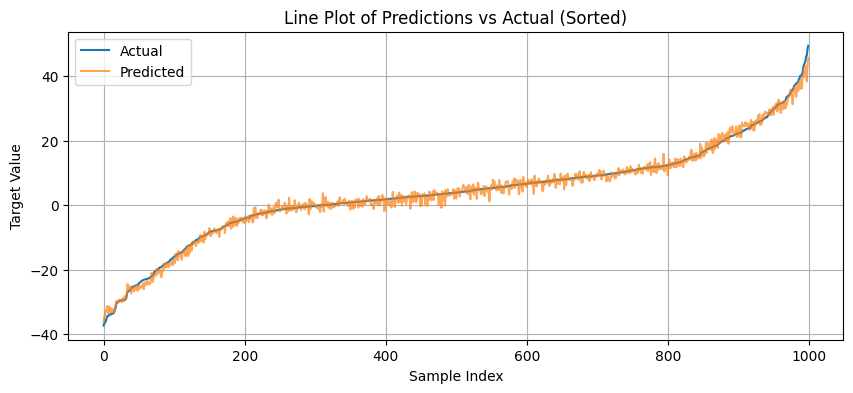

In [11]:
# Step 11: Line Plot of Predictions vs True Y for Sorted Sample
sorted_idx = np.argsort(y_train[:, 0])
plt.figure(figsize=(10, 4))
plt.plot(y_train[sorted_idx], label='Actual')
plt.plot(y_pred[sorted_idx], label='Predicted', alpha=0.7)
plt.title("Line Plot of Predictions vs Actual (Sorted)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Step 12: Custom Test Predictions
def predict_custom(model, x1, x2, x3):
    sample = np.array([[x1, x2, x3]], dtype=np.float32)
    return model.predict(sample)[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]

print("\nCustom Test Predictions:")
for x1, x2, x3 in test_points:
    pred = predict_custom(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Predicted: {pred:.3f}, Actual: {actual:.3f}")



Custom Test Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Input: (-4, -4, -4) → Predicted: -9.821, Actual: -10.644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Input: (0, 0, 0) → Predicted: -1.446, Actual: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Input: (4, 4, 4) → Predicted: 26.111, Actual: 24.729
